1. Convolution function:

In [687]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [688]:
a2=unpickle(r"D:\Deep Learning\cifar-10-batches-py\data_batch_2")
training_labels=a2.get('labels')


In [689]:
image1=a2['data'][0]

In [690]:
image1=image1.reshape(3,32,32)
image1.shape

(3, 32, 32)

In [691]:
import matplotlib.pyplot as plt
image1=image1.transpose(1,2,0)
print(image1.shape)


(32, 32, 3)


In [692]:
def pad(img,pad_width):
    img_pad = np.zeros(shape=(
        img.shape[0] + pad_width * 2,
        img.shape[1] + pad_width * 2
    ))
    img_pad[pad_width:-pad_width, pad_width:-pad_width] = img
    
    return img_pad

In [693]:
import numpy as np
kernel2=np.array([[[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                  [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]]])

In [694]:
def activ(a1,a,param):
    if a1=='sigmoid':
        return 1/(1 + np.exp(-a))
    if a1=='tanh':
        return np.tanh(a)
    if a1=='RELU':
        a[a<=0]=0
        return a
    if a1=='PRELU':
        a[a<=0]=param*a[a<=0]
        return a
        
        

In [695]:
def convolution(pic,kernel,stride,pad_width,nonfun):
    plt.imshow(pic)
    print(kernel)
    s_hgt = pic.shape[0]
    s_wth = pic.shape[1]
    s_dth = pic.shape[2]
    m=round((s_hgt-kernel.shape[0]+2*pad_width)/stride)+1
    n=round((s_wth-kernel.shape[1]+2*pad_width)/stride)+1
    ar = np.zeros((m,n,s_dth))
    for x in range(s_dth): 
        pic_ = pic[:,:,x]
        kernel1 = kernel[:,:,x]         #flipping kernel as either of kernel or image should be flipped                                                
        kernel1 = np.flip(kernel1)
        kernel1h, kernel1w = kernel1.shape

                                            #padding is done to take care of proper convolution
        pic_pad =pad(pic_, kernel1h - 1)
        m=round((s_hgt-kernel.shape[0]+2*pad_width)/stride)+1
        n=round((s_wth-kernel.shape[1]+2*pad_width)/stride)+1

        convl_pic = np.zeros((m,n))

                                              # Move through the row and coulum for 258 size
        for i in range(0,m):
            for j  in range(0,n):
                                              # get the subarray for multiplying and further adding

                sub_array = pic_pad[i*stride :i*stride + kernel1h , j*stride:j*stride + kernel1w]
                convl_pic[i,j] = np.sum(sub_array * kernel1)

        ar[:,:,x] = ar[:,:,x] + convl_pic
        
    sum = np.zeros((s_hgt, s_wth));
    sum = ar[:,:,0]+ar[:,:,1]+ar[:,:,2]
    
    sum/=(sum.max()/255.0)
    sum1=activ('RELU',sum,0.2)
    return sum1

[[[ 0 -1  0]
  [-1  5 -1]
  [ 0 -1  0]]

 [[ 0 -1  0]
  [-1  5 -1]
  [ 0 -1  0]]

 [[ 0 -1  0]
  [-1  5 -1]
  [ 0 -1  0]]]


array([[  0.        ,   2.96224589,   2.71539206,   0.        ,
          3.45595353,   1.97483059,   0.        ,  37.76863504,
         28.14133591,  25.9196515 ,  33.81897386,  21.22942885,
         25.42594385,  22.71055179,  36.53436592,  34.55953533,
         53.07357212],
       [  0.        ,  15.30493708,   7.15876089,   6.1713456 ,
         10.86156825,  10.12100678,   0.        , 118.24298161,
         74.30300097, 108.61568248,  87.13939981,  82.9428848 ,
        102.44433688,  83.43659245,  91.58276864,  68.13165537,
        114.78702807],
       [  0.        ,  44.43368829,   8.88673766,  16.78606002,
         20.48886738,  24.43852856,   0.        , 127.37657309,
         72.32817038, 118.98354308, 104.91287512, 101.95062924,
        120.71151985, 100.96321394,  89.85479187,  46.16166505,
         93.80445305],
       [  0.        ,  62.94772507,  17.77347531,  30.11616651,
         39.99031946,  14.07066796,   0.        , 129.10454985,
         87.38625363, 125.89545015,

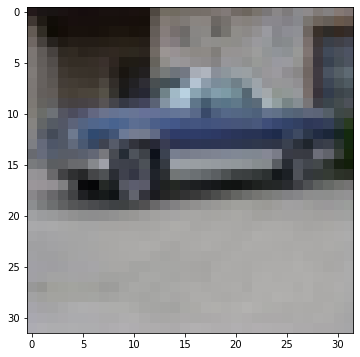

In [696]:
import matplotlib.pyplot as plt

a5=convolution(image1,kernel2,2,2,'tanh')
a5

2.Pooling function:

In [697]:
def pooling(activation_map,pooling_type,pooling,stride):
    (l,h)=activation_map.shape
    amap=np.zeros((((l-pooling)//stride)+1,((l-pooling)//stride)+1))
    print(l,h,amap.shape)
    
    n=0
    for i in range(0,h-1,stride):
        m=0
        for j in range(0,l-1,stride):
            if (pooling_type=='max'):
                amap[n,m]=np.max(activation_map[j:j+pooling,i:i+pooling])
            if (pooling_type=='mean'):
                amap[n,m]=np.mean(activation_map[j:j+pooling,i:i+pooling])
            if (pooling_type=='min'):
                amap[n,m]=np.min(activation_map[j:j+pooling,i:i+pooling])
            m=m+1
        n=n+1
    return activation_map,amap

In [698]:
pooling(a5,'max',2,2)

17 17 (8, 8)


(array([[  0.        ,   2.96224589,   2.71539206,   0.        ,
           3.45595353,   1.97483059,   0.        ,  37.76863504,
          28.14133591,  25.9196515 ,  33.81897386,  21.22942885,
          25.42594385,  22.71055179,  36.53436592,  34.55953533,
          53.07357212],
        [  0.        ,  15.30493708,   7.15876089,   6.1713456 ,
          10.86156825,  10.12100678,   0.        , 118.24298161,
          74.30300097, 108.61568248,  87.13939981,  82.9428848 ,
         102.44433688,  83.43659245,  91.58276864,  68.13165537,
         114.78702807],
        [  0.        ,  44.43368829,   8.88673766,  16.78606002,
          20.48886738,  24.43852856,   0.        , 127.37657309,
          72.32817038, 118.98354308, 104.91287512, 101.95062924,
         120.71151985, 100.96321394,  89.85479187,  46.16166505,
          93.80445305],
        [  0.        ,  62.94772507,  17.77347531,  30.11616651,
          39.99031946,  14.07066796,   0.        , 129.10454985,
          87.38625

In [699]:
pooling(a5,'mean',2,2)

17 17 (8, 8)


(array([[  0.        ,   2.96224589,   2.71539206,   0.        ,
           3.45595353,   1.97483059,   0.        ,  37.76863504,
          28.14133591,  25.9196515 ,  33.81897386,  21.22942885,
          25.42594385,  22.71055179,  36.53436592,  34.55953533,
          53.07357212],
        [  0.        ,  15.30493708,   7.15876089,   6.1713456 ,
          10.86156825,  10.12100678,   0.        , 118.24298161,
          74.30300097, 108.61568248,  87.13939981,  82.9428848 ,
         102.44433688,  83.43659245,  91.58276864,  68.13165537,
         114.78702807],
        [  0.        ,  44.43368829,   8.88673766,  16.78606002,
          20.48886738,  24.43852856,   0.        , 127.37657309,
          72.32817038, 118.98354308, 104.91287512, 101.95062924,
         120.71151985, 100.96321394,  89.85479187,  46.16166505,
          93.80445305],
        [  0.        ,  62.94772507,  17.77347531,  30.11616651,
          39.99031946,  14.07066796,   0.        , 129.10454985,
          87.38625

In [700]:
pooling(a5,'min',2,2)

17 17 (8, 8)


(array([[  0.        ,   2.96224589,   2.71539206,   0.        ,
           3.45595353,   1.97483059,   0.        ,  37.76863504,
          28.14133591,  25.9196515 ,  33.81897386,  21.22942885,
          25.42594385,  22.71055179,  36.53436592,  34.55953533,
          53.07357212],
        [  0.        ,  15.30493708,   7.15876089,   6.1713456 ,
          10.86156825,  10.12100678,   0.        , 118.24298161,
          74.30300097, 108.61568248,  87.13939981,  82.9428848 ,
         102.44433688,  83.43659245,  91.58276864,  68.13165537,
         114.78702807],
        [  0.        ,  44.43368829,   8.88673766,  16.78606002,
          20.48886738,  24.43852856,   0.        , 127.37657309,
          72.32817038, 118.98354308, 104.91287512, 101.95062924,
         120.71151985, 100.96321394,  89.85479187,  46.16166505,
          93.80445305],
        [  0.        ,  62.94772507,  17.77347531,  30.11616651,
          39.99031946,  14.07066796,   0.        , 129.10454985,
          87.38625

3. Convolution layer function:

In [701]:
import numpy as np
kernel3=np.array([[[[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                  [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]]],
                  [[[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                 
                  [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]]]])
kernel3=np.transpose(kernel3)
kernel3.shape

(3, 3, 3, 2)

In [702]:
def convolutionlayer(pic,kernel,stride,pad_width,nonfun):
    s_hgt = pic.shape[0]
    s_wth = pic.shape[1]
    s_dth = pic.shape[2]
    m=round((s_hgt-kernel.shape[0]+2*pad_width)/stride)+1
    n=round((s_wth-kernel.shape[1]+2*pad_width)/stride)+1
    ar = np.zeros((m,n,s_dth))
    e=kernel.shape[3]
    fsum=np.zeros((m,n,kernel.shape[3]))
    kernel=kernel[:,:,:,1]
    for k in range(e):
        for x in range(s_dth): 
                pic_ = pic[:,:,x]
                kernel1 = kernel[:,:,x]  #flipping kernel as either of kernel or image should be flipped                                                
                kernel1 = np.flip(kernel1)
                kernel1h, kernel1w = kernel1.shape[0],kernel1.shape[1]
                #padding
                pic_pad =pad(pic_, kernel1h - 1)
                m=round((s_hgt-kernel.shape[0]+2*pad_width)/stride)+1
                n=round((s_wth-kernel.shape[1]+2*pad_width)/stride)+1
                convl_pic = np.zeros((m,n))
        for i in range(0,m):
            for j  in range(0,n):
                sub_array = pic_pad[i*stride :i*stride + kernel1h , j*stride:j*stride + kernel1w]
                convl_pic[i,j] = np.sum(sub_array * kernel1[:,:])
            ar[:,:,x] = ar[:,:,x] + convl_pic
        sum = np.zeros((s_hgt, s_wth));
        sum = ar[:,:,0]+ar[:,:,1]+ar[:,:,2]
        sum1=activ(nonfun,sum,0.2)
        sum1=sum1.reshape((m,n,1))
        fsum[:,:,k]=sum1[:,:,0]
    return fsum

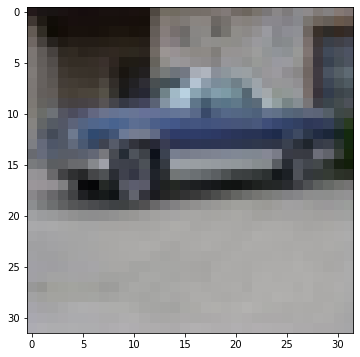

In [703]:
plt.imshow(image1)
#Input IMAGE

In [704]:
convolutionlayer(image1,kernel3,2,2,'RELU') #Output activation map

array([[[   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.]],

       [[   0.,    0.],
        [   0.,    0.],
        [ 112.,  224.],
        [ 192.,  384.],
        [ 128.,  256.],
        [ 144.,  288.],
        [   0.,    0.],
        [2704., 5408.],
        [2288., 4576.],
        [2784., 5568.],
        [1392., 2784.],
        [2128., 4256.],
        [2544., 5088.],
        [1936., 3872.],
        [1456., 2912.],
        [1648., 3296.],
        [2480., 4960.]],

       [[   0.,    0.],
        [ 765., 1530.],
        [   0.,    0.],
        [ 375.,  750.],
        [ 225.,  450.],
        [ 390.,  780.],
        [   0.,    0.],
        [249

In [705]:
s=convolutionlayer(image1,kernel3,2,2,'RELU')

In [706]:
s.shape

(17, 17, 2)

4. Pooling layer function:

In [707]:
def poolinglayer(activation_map,pooling_type,pooling,stride):
    (l,h,b)=activation_map.shape
    amap1=np.zeros((((round((l-pooling)//stride)+1),(round((l-pooling)//stride)+1),b)))
    for o in range(amap1.shape[2]):
        n=0
        for i in range(0,h-1,stride):
            m=0
            for j in range(0,l-1,stride):
                if (pooling_type=='max'):
                    amap1[n,m]=np.max(activation_map[j:j+pooling,i:i+pooling])
                if (pooling_type=='mean'):
                    amap1[n,m]=np.mean(activation_map[j:j+pooling,i:i+pooling])
                if (pooling_type=='min'):
                    amap1[n,m]=np.min(activation_map[j:j+pooling,i:i+pooling])
                m=m+1
            n=n+1
    return activation_map

In [708]:
poolinglayer(s,'mean',2,2)

array([[[   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.]],

       [[   0.,    0.],
        [   0.,    0.],
        [ 112.,  224.],
        [ 192.,  384.],
        [ 128.,  256.],
        [ 144.,  288.],
        [   0.,    0.],
        [2704., 5408.],
        [2288., 4576.],
        [2784., 5568.],
        [1392., 2784.],
        [2128., 4256.],
        [2544., 5088.],
        [1936., 3872.],
        [1456., 2912.],
        [1648., 3296.],
        [2480., 4960.]],

       [[   0.,    0.],
        [ 765., 1530.],
        [   0.,    0.],
        [ 375.,  750.],
        [ 225.,  450.],
        [ 390.,  780.],
        [   0.,    0.],
        [249

In [709]:
poolinglayer(s,'min',2,2)

array([[[   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.]],

       [[   0.,    0.],
        [   0.,    0.],
        [ 112.,  224.],
        [ 192.,  384.],
        [ 128.,  256.],
        [ 144.,  288.],
        [   0.,    0.],
        [2704., 5408.],
        [2288., 4576.],
        [2784., 5568.],
        [1392., 2784.],
        [2128., 4256.],
        [2544., 5088.],
        [1936., 3872.],
        [1456., 2912.],
        [1648., 3296.],
        [2480., 4960.]],

       [[   0.,    0.],
        [ 765., 1530.],
        [   0.,    0.],
        [ 375.,  750.],
        [ 225.,  450.],
        [ 390.,  780.],
        [   0.,    0.],
        [249

In [710]:
def poolinglayer1(activation_map,pooling_type,pooling,stride):
    (l,h,b)=activation_map.shape
    amap1=np.zeros((((round((l-pooling)//stride)+1),(round((l-pooling)//stride)+1),b)))
    for o in range(amap1.shape[2]):
        n=0
        for i in range(0,h-1,stride):
            m=0
            for j in range(0,l-1,stride):
                if (pooling_type=='max'):
                    amap1[n,m]=np.max(activation_map[j:j+pooling,i:i+pooling])
                if (pooling_type=='mean'):
                    amap1[n,m]=np.mean(activation_map[j:j+pooling,i:i+pooling])
                if (pooling_type=='min'):
                    amap1[n,m]=np.min(activation_map[j:j+pooling,i:i+pooling])
                m=m+1
            n=n+1
    return activation_map

In [711]:
g=poolinglayer1(s,'max',2,2)

In [712]:
g

array([[[   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.],
        [   0.,    0.]],

       [[   0.,    0.],
        [   0.,    0.],
        [ 112.,  224.],
        [ 192.,  384.],
        [ 128.,  256.],
        [ 144.,  288.],
        [   0.,    0.],
        [2704., 5408.],
        [2288., 4576.],
        [2784., 5568.],
        [1392., 2784.],
        [2128., 4256.],
        [2544., 5088.],
        [1936., 3872.],
        [1456., 2912.],
        [1648., 3296.],
        [2480., 4960.]],

       [[   0.,    0.],
        [ 765., 1530.],
        [   0.,    0.],
        [ 375.,  750.],
        [ 225.,  450.],
        [ 390.,  780.],
        [   0.,    0.],
        [249

5. Flattening (unraveling) function:

In [713]:
np.ravel(g).shape

(578,)

In [714]:
g=np.reshape(np.ravel(g), (np.ravel(g).shape[0],1))

In [715]:
g.shape

(578, 1)

6.Multilayer Perceptron (MLP) function (Fully Connected):

In [716]:
def activation(a1,a,param):
    if a1=='sigmoid':
        return 1/(1 + np.exp(-a))
    if a1=='tanh':
        return np.tanh(a)
    if a1=='RELU':
        a[a<=0]=0
        return a
    if a1=='PRELU':
        a[a<=0]=param*a[a<=0]
        return a

In [717]:
def mlp(input_vec,no_of_h,size_of_h,nonfun,size_of_output):
    r=input_vec
    print(r.shape)
    s=np.random.randn(r.shape[0],size_of_h)
    input_lo=np.dot(np.transpose(r),s)
    input_lo=activation(nonfun,input_lo,0.2)
    print(input_lo.shape)
    input_lo=np.transpose(input_lo)
    s1=np.random.randn(input_lo.shape[0],size_of_output)
    output_ml=np.dot(np.transpose(input_lo),s1)
    output_ml=activation(nonfun,output_ml,0.2)
    print(output_ml.shape)
    return output_ml

In [718]:
mlp(g,1,30,"sigmoid",10)

(578, 1)
(1, 30)
(1, 10)


<ipython-input-716-74b4c6560d66>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.93248984, 0.80862443, 0.87793485, 0.0200274 , 0.22709572,
        0.7306867 , 0.00684246, 0.00558051, 0.23305675, 0.95686116]])

In [719]:
 def softmax(a):
    exp=np.exp(a) 
    ans=exp/np.sum(exp,axis=1,keepdims=True)
    return ans

In [720]:
def mlp_with_softmax(input_vec,no_of_h,size_of_h,nonfun,size_of_output):
    r=input_vec
    s=np.random.randn(r.shape[0],size_of_h)
    input_lo=np.dot(np.transpose(r),s)
    input_lo=activation(nonfun,input_lo,0.2)
    input_lo=np.transpose(input_lo)
    s1=np.random.randn(input_lo.shape[0],size_of_output)
    output_ml=np.dot(np.transpose(input_lo),s1)
    output_ml=activation(nonfun,output_ml,0.2)
    return softmax(output_ml)

In [721]:
mlp_with_softmax(g,1,300,"sigmoid",10)

<ipython-input-716-74b4c6560d66>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.08990579, 0.07856492, 0.07828337, 0.07808755, 0.07854401,
        0.08229105, 0.20896859, 0.07809074, 0.08284233, 0.14442165]])

7. Feed-forward path:

(32, 32, 3)


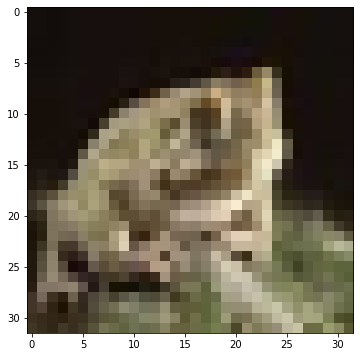

In [722]:
kernelf=np.random.randn(3,3,3,16)
kernelf1=np.random.randn(3,3,16,8)
image2=a2['data'][1]
image2=image2.reshape(3,32,32)
image2.shape
image2=image2.transpose(1,2,0)
print(image2.shape)
plt.imshow(image2)

In [723]:
def feed_forward_path(pic):
    pic=pic.reshape(3,32,32)
    pic.shape
    pic=pic.transpose(1,2,0)
    plt.imshow(pic)
    oc1=convolutionlayer(pic,kernelf,2,2,'sigmoid')
    pic=pic.reshape(3,32,32)
    pic=pic.transpose(1,2,0)
    pl1=poolinglayer(oc1,'max',2,2)
    oc2=convolutionlayer(pl1,kernelf1,2,2,'sigmoid')
    pl2=poolinglayer(oc2,'max',2,2)
    np.ravel(pl2).shape[0]
    unravelled=np.reshape(np.ravel(pl2), (np.ravel(pl2).shape[0],1))
    fop=mlp_with_softmax(unravelled,1,400,'sigmoid',10)
    
    return fop

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.05923524, 0.16095844, 0.16099037, 0.16099036, 0.05926017,
        0.15890695, 0.05922511, 0.05922639, 0.05922505, 0.06198193]])

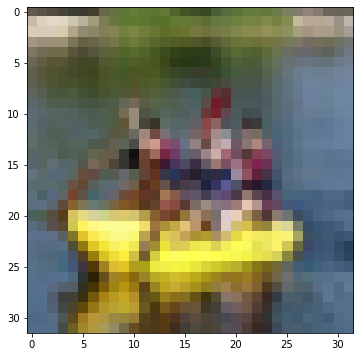

In [724]:
final=feed_forward_path(a2['data'][3])
final

8. (a)

In [725]:
z=np.unique(training_labels,return_index=True)

In [726]:
list(z)[1]


array([ 8,  0, 18,  5,  6, 14,  1, 28,  3, 30], dtype=int64)

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.08620107, 0.15623482, 0.05778294, 0.05749382, 0.06096634,
        0.15381259, 0.05749987, 0.15623288, 0.15628195, 0.05749372]])

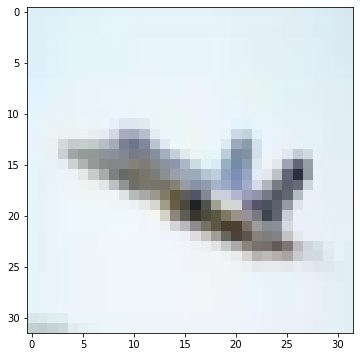

In [727]:
feed_forward_path(a2['data'][8])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.07658628, 0.07655575, 0.0765559 , 0.07655715, 0.07655575,
        0.07655575, 0.20810011, 0.07658589, 0.16878887, 0.08715854]])

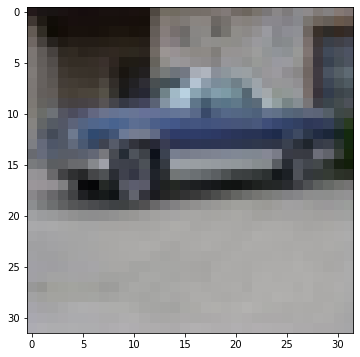

In [728]:
feed_forward_path(a2['data'][0])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.05790555, 0.15682814, 0.14051191, 0.06973048, 0.15644061,
        0.05769385, 0.07338991, 0.05823933, 0.15682814, 0.07243209]])

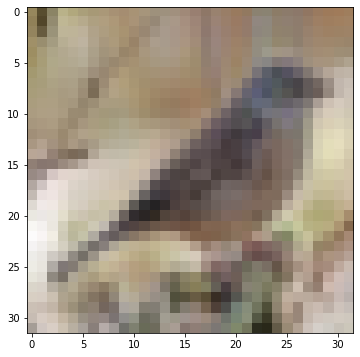

In [729]:
feed_forward_path(a2['data'][18])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.04619716, 0.12355559, 0.1235553 , 0.08117492, 0.12274581,
        0.12355544, 0.12355207, 0.04545356, 0.08677452, 0.12343564]])

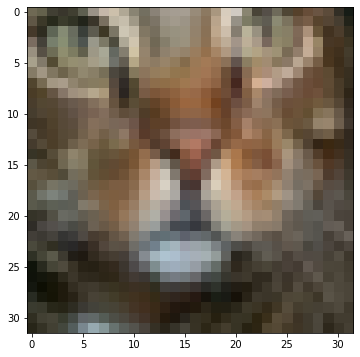

In [730]:
feed_forward_path(a2['data'][5])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.1484702 , 0.14561055, 0.14847006, 0.05461915, 0.05477526,
        0.07643532, 0.0546228 , 0.14845419, 0.11388307, 0.05465941]])

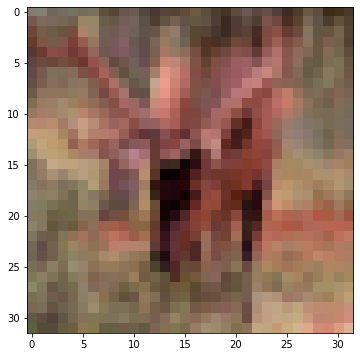

In [731]:
feed_forward_path(a2['data'][6])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.06059847, 0.06051297, 0.16448839, 0.16417694, 0.06051297,
        0.06051296, 0.06051296, 0.06051308, 0.16448313, 0.14368812]])

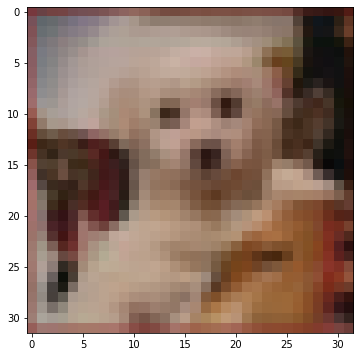

In [732]:
feed_forward_path(a2['data'][14])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.05830226, 0.0531035 , 0.11866359, 0.1342334 , 0.13423345,
        0.04938177, 0.13423342, 0.13423345, 0.04938182, 0.13423334]])

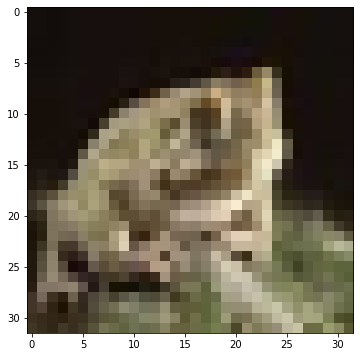

In [733]:
feed_forward_path(a2['data'][1])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.13244764, 0.13215551, 0.04872519, 0.04872476, 0.04872477,
        0.13244764, 0.13244741, 0.13244759, 0.1324473 , 0.05943219]])

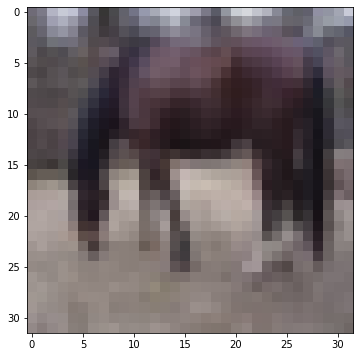

In [734]:
feed_forward_path(a2['data'][28])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.1142902 , 0.04207935, 0.11283037, 0.11436006, 0.11435887,
        0.11435995, 0.04470276, 0.11436007, 0.11436008, 0.11429829]])

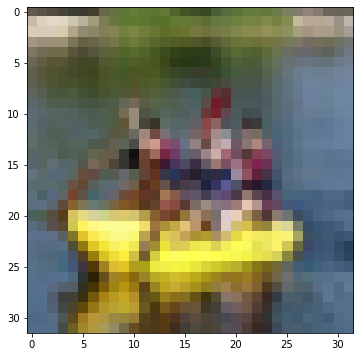

In [735]:
feed_forward_path(a2['data'][3])

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


array([[0.06521637, 0.05630812, 0.05640442, 0.05630812, 0.15306135,
        0.06996315, 0.15306134, 0.15306132, 0.15306135, 0.08355444]])

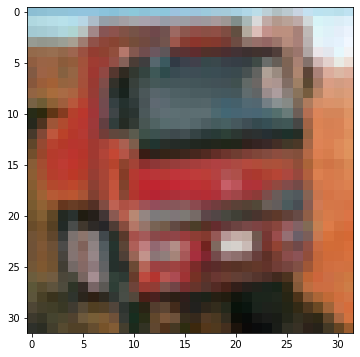

In [736]:
feed_forward_path(a2['data'][30])

8. (b)

In [737]:
z1=np.unique(training_labels,return_index=True)

In [738]:
z1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 8,  0, 18,  5,  6, 14,  1, 28,  3, 30], dtype=int64))

In [739]:
index=np.zeros((10,3),dtype="u2")
for j in range(10):
    flag=0
    for i in range(200):
        if(training_labels[i]==j and flag<3):
            index[j][flag]=i
            flag+=1
        if(flag>3):
            break
index


array([[ 8, 10, 20],
       [ 0, 22, 35],
       [18, 27, 57],
       [ 5, 11, 17],
       [ 6, 15, 23],
       [14, 33, 60],
       [ 1,  2,  7],
       [28, 34, 37],
       [ 3,  4, 16],
       [30, 38, 56]], dtype=uint16)

In [740]:
def unravelled(pic):
    pic=pic.reshape(3,32,32)
    pic.shape
    pic=pic.transpose(1,2,0)
    oc1=convolutionlayer(pic,kernelf,2,2,'sigmoid')
    pic=pic.reshape(3,32,32)
    pic=pic.transpose(1,2,0)
    pl1=poolinglayer(oc1,'max',2,2)
    oc2=convolutionlayer(pl1,kernelf1,2,2,'sigmoid')
    pl2=poolinglayer(oc2,'max',2,2)
    np.ravel(pl2).shape[0]
    unravelled=np.reshape(np.ravel(pl2), (np.ravel(pl2).shape[0],1))
    return unravelled

In [741]:
unravelled(a2['data'][30]).shape

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


(800, 1)

In [742]:
def func():
    arr=np.zeros((800,30))
    k=0
    for j in range(10):
        for i in range(3):
            m=index[j][i]
            image = a2['data'][m]
            flatten=unravelled(image).reshape(800)
            arr[:,k]=flatten
            k=k+1
    return arr

In [743]:
func1=np.transpose(func())

<ipython-input-694-02122e83ec8d>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


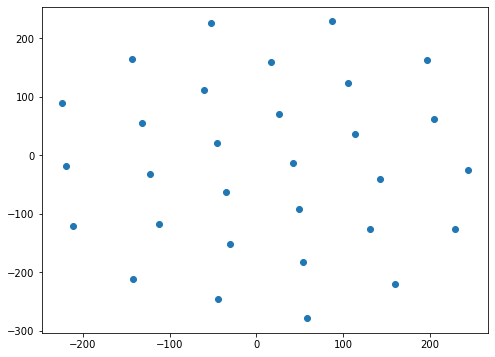

In [744]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = (8,6)
x_embed = TSNE(n_components=2,init='random').fit_transform(func1)
plt.scatter(x_embed[:,0],x_embed[:,1])
plt.show()